<a href="https://colab.research.google.com/github/Chetalam/AI-Coursework-2025/blob/main/Mall_Customers_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files


uploaded = files.upload()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/content/Mall_Customers.csv')


1. Download and upload the Mall Customer Segmentation Dataset from Kaggle.

In [ ]:
# 1. Scrub for Duplicates
import pandas as pd
df = pd.read_csv('Mall_Customers.csv')
df.duplicated()
print("Duplicate rows (True = duplicate):")
print(df.duplicated())
print("\nNumber of duplicate rows before removing:", df.duplicated().sum())
df = df.drop_duplicates()
print("\nNumber of duplicate rows after removing:", df.duplicated().sum())
print("\nCleaned DataFrame:")
print(df)

Duplicate rows (True = duplicate):
0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

Number of duplicate rows before removing: 0

Number of duplicate rows after removing: 0

Cleaned DataFrame:
     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32   

In [ ]:
# 2. Scrub for Irrelevant Data

print("Columns before removing irrelevant data:", df.columns.tolist())

df = df.drop(columns=['CustomerID'])

print("Columns after removing irrelevant data:", df.columns.tolist())


print("\nCleaned data:")
print(df.head())



Columns before removing irrelevant data: ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
Columns after removing irrelevant data: ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

Cleaned data:
   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40


In [ ]:
# STEP 3: Scrub for Incorrect Data

df[df['Age'] < 0]

df = df[df['Age'] >= 0]

print("Cleaned invalid ages.")

Cleaned invalid ages.


In [ ]:
# STEP 4: Fix Structural Errors

# 1. Strip leading/trailing spaces in column names
df.columns = df.columns.str.strip()

# 2. Fix text formatting inconsistencies for categorical fields
# Example: Standardizing the "Gender" column
df['Gender'] = df['Gender'].str.strip().str.title()   # e.g. "male ", "FEMALE" → "Male", "Female"

# 3. Fix datatype issues (e.g. numeric columns accidentally read as string)
numeric_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

print("Structural errors fixed. Preview:")
print(df.head())


Structural errors fixed. Preview:
   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40


In [ ]:
# STEP 5: Handle Missing Data

print("=== STEP 5: Handling Missing Data ===")

print("\nMissing values in each column:")
print(df.isnull().sum())


total_missing = df.isnull().sum().sum()
print(f"\nTotal missing values in the dataset: {total_missing}")


print("\nPercentage of missing values in each column:")
print((df.isnull().sum() / len(df)) * 100)

print("\nData types:")
print(df.dtypes)


print(f"\nDataset shape: {df.shape}")


print("\nSummary statistics:")
print(df.describe())

print("\nData cleaning completed successfully! No missing values found.")

=== STEP 5: Handling Missing Data ===

Missing values in each column:
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Total missing values in the dataset: 0

Percentage of missing values in each column:
Gender                    0.0
Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64

Data types:
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

Dataset shape: (200, 4)

Summary statistics:
              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%    

In [ ]:
#  Step 6: Check Outliers using the IQR (Interquartile Range) method


numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
print(" Numeric Columns:", numeric_cols)

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"\n Column: {col}")
    print(f"    Outliers detected: {len(outliers)}")
    if not outliers.empty:
        print(outliers[[col]].head())

print("Outlier check completed.")


 Numeric Columns: ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster_Income', 'Cluster_Income_Spend']

 Column: Age
    Outliers detected: 0

 Column: Annual Income (k$)
    Outliers detected: 2
     Annual Income (k$)
198                 137
199                 137

 Column: Spending Score (1-100)
    Outliers detected: 0

 Column: Cluster_Income
    Outliers detected: 0

 Column: Cluster_Income_Spend
    Outliers detected: 0
Outlier check completed.


In [ ]:
# STEP 7: Standardize and Normalize
print("Standardize and Normalize")
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Numeric columns:", numeric_cols)

# Standardization
scaler_standard = StandardScaler()
df_standardized = df.copy()
df_standardized[numeric_cols] = scaler_standard.fit_transform(df[numeric_cols])
print("Standardized data:")
print(df_standardized[numeric_cols].head())

# Normalization
scaler_minmax = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numeric_cols] = scaler_minmax.fit_transform(df[numeric_cols])
print("Normalized data:")
print(df_normalized[numeric_cols].head())

# Log Transformation
df_log_transformed = df.copy()
for col in numeric_cols:
    df_log_transformed[col] = df[col].apply(lambda x: np.log(x + 1) if x > 0 else 0)
print("Log-transformed data:")
print(df_log_transformed[numeric_cols].head())
print("Step 7 completed successfully.")


=== STEP 7: Standardize + Normalize ===
Numeric columns to be scaled: ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

 Standardization completed (mean = 0, std = 1):
        Age  Annual Income (k$)  Spending Score (1-100)
0 -1.424569           -1.738999               -0.434801
1 -1.281035           -1.738999                1.195704
2 -1.352802           -1.700830               -1.715913
3 -1.137502           -1.700830                1.040418
4 -0.563369           -1.662660               -0.395980

 Normalization completed (range: 0 → 1):
        Age  Annual Income (k$)  Spending Score (1-100)
0  0.019231            0.000000                0.387755
1  0.057692            0.000000                0.816327
2  0.038462            0.008197                0.051020
3  0.096154            0.008197                0.775510
4  0.250000            0.016393                0.397959

 Log Transformation completed (for positive numeric values):
        Age  Annual Income (k$)  Spending Score 

Exploratory data analysis


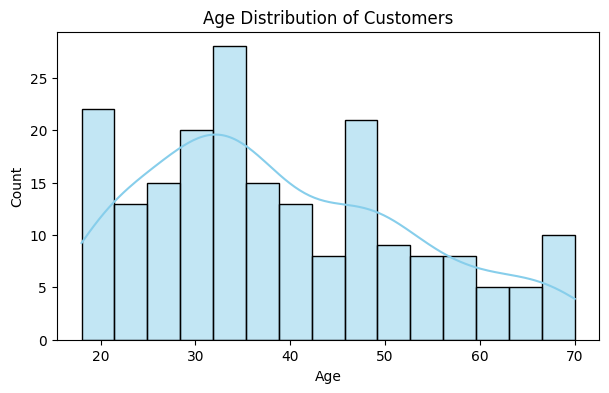

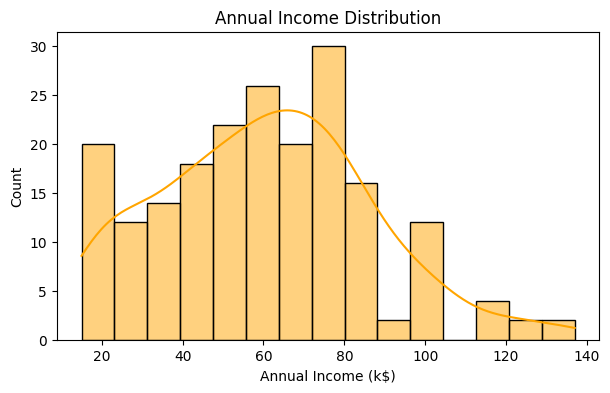

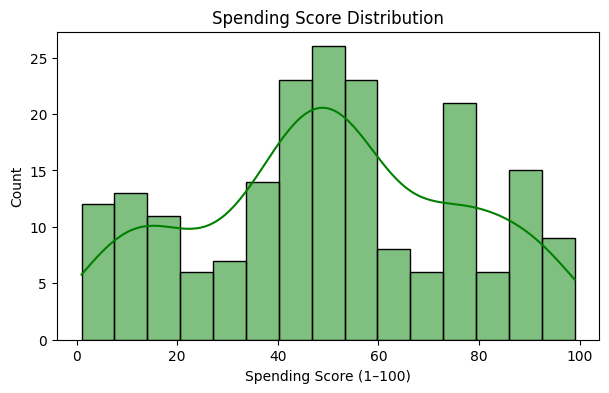

In [ ]:
#1st Insight

import matplotlib.pyplot as plt
import seaborn as sns

#AGE DISTRIBUTION
plt.figure(figsize=(7,4))
sns.histplot(df['Age'], bins=15, kde=True, color='skyblue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#ANNUAL INCOME DISTRIBUTION
plt.figure(figsize=(7,4))
sns.histplot(df['Annual Income (k$)'], bins=15, kde=True, color='orange')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Count')
plt.show()

#SPENDING SCORE DISTRIBUTION
plt.figure(figsize=(7,4))
sns.histplot(df['Spending Score (1-100)'], bins=15, kde=True, color='green')
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score (1–100)')
plt.ylabel('Count')
plt.show()


/tmp/ipython-input-3334924174.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='Set2')


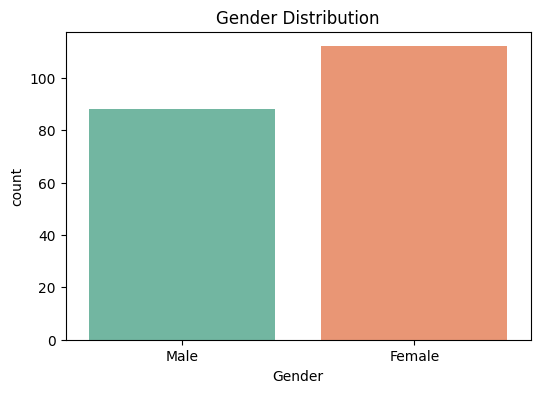

/tmp/ipython-input-3334924174.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df, palette='pastel')


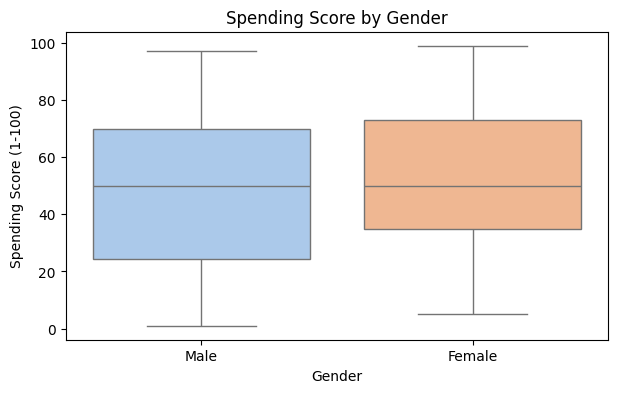

In [ ]:
#2nd insight
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df, palette='Set2')
plt.title('Gender Distribution')
plt.show()

plt.figure(figsize=(7,4))
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df, palette='pastel')
plt.title('Spending Score by Gender')
plt.show()


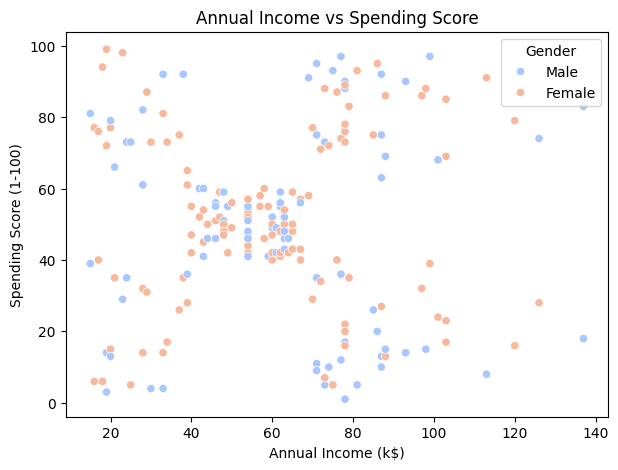

In [ ]:
#3rd insight
plt.figure(figsize=(7,5))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Gender',
    data=df,
    palette='coolwarm'
)
plt.title('Annual Income vs Spending Score')
plt.show()


3. K-means algorithm


a. 1 suitable feature:

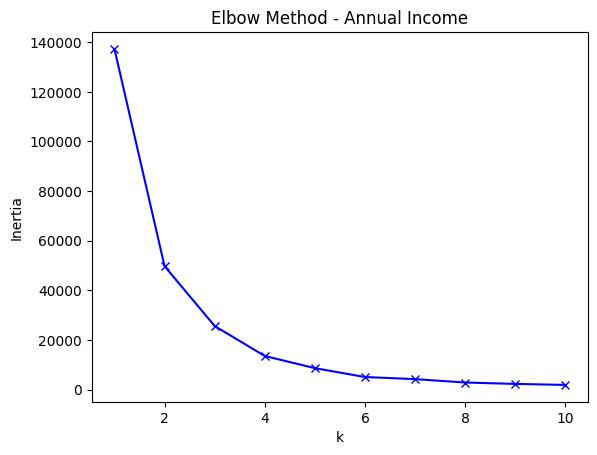

Silhouette Score (1 feature): 0.5188101430914764


In [ ]:
X1 = df[['Annual Income (k$)']]


inertia = []
K = range(1, 11)
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X1)
    inertia.append(model.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method - Annual Income')
plt.show()


k_opt = 3
kmeans1 = KMeans(n_clusters=k_opt, random_state=42)
df['Cluster_Income'] = kmeans1.fit_predict(X1)


score1 = silhouette_score(X1, df['Cluster_Income'])
print("Silhouette Score (1 feature):", score1)

b. K-Means with 2 Features -Annual Income and Spending Score

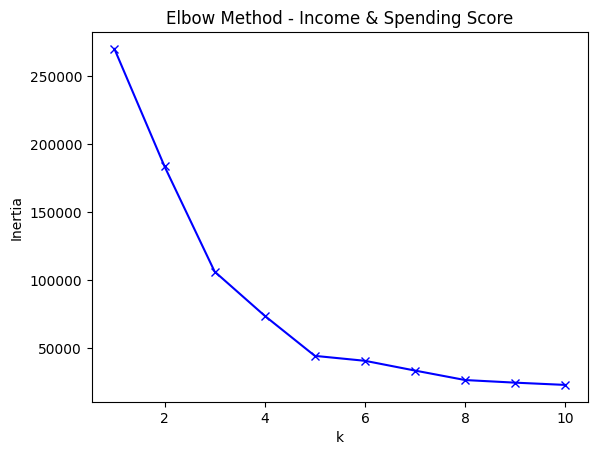

Silhouette Score (2 features): 0.553931997444648


In [ ]:
X2 = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Elbow Method
inertia2 = []
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X2)
    inertia2.append(model.inertia_)

plt.plot(K, inertia2, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method - Income & Spending Score')
plt.show()

# Optimal k (usually 5 for this dataset)
k_opt2 = 5
kmeans2 = KMeans(n_clusters=k_opt2, random_state=42)
df['Cluster_Income_Spend'] = kmeans2.fit_predict(X2)

# Silhouette Score
score2 = silhouette_score(X2, df['Cluster_Income_Spend'])
print("Silhouette Score (2 features):", score2)

4a. Visualisation for One Feature

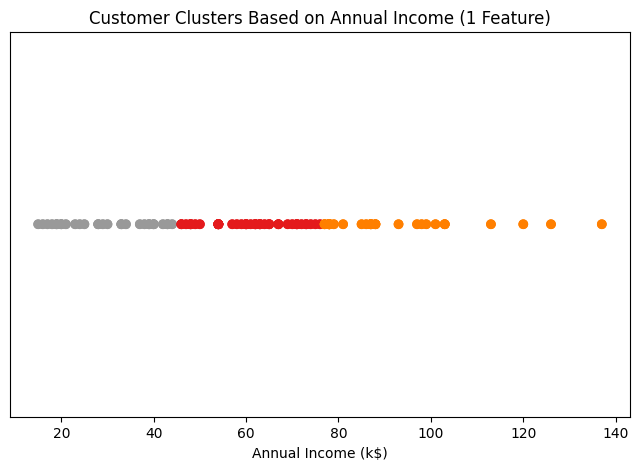

In [ ]:


plt.figure(figsize=(8,5))
plt.scatter(df['Annual Income (k$)'], [0]*len(df), c=df['Cluster_Income'], cmap='Set1')
plt.xlabel('Annual Income (k$)')
plt.title('Customer Clusters Based on Annual Income (1 Feature)')
plt.yticks([])
plt.show()


b Visualisation for Two Features

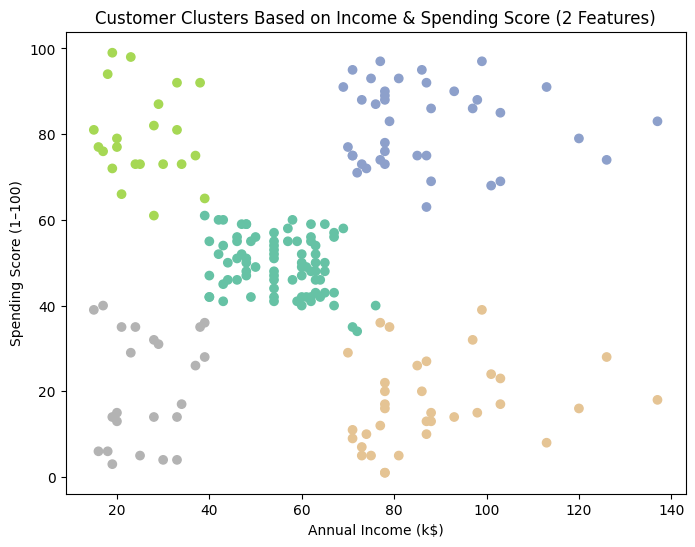

In [ ]:


plt.figure(figsize=(8,6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
            c=df['Cluster_Income_Spend'], cmap='Set2')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1–100)')
plt.title('Customer Clusters Based on Income & Spending Score (2 Features)')
plt.show()


Clustering 3a — Using Only Annual Income
The customers are grouped only based on their income levels. The clusters appear as straight horizontal bands, meaning the algorithm is simply dividing people into low-income, middle-income, and high-income groups. However, this approach ignores their spending behavior — so two customers with the same income but totally different spending habits are placed in the same cluster. This gives limited insight and is not useful for marketing or customer targeting.

Clustering 3b — Using Annual Income and Spending Score
This clustering is far more meaningful and realistic. Since both income and spending behaviour are considered, the clusters form visually separate bubble-like groups. We can clearly identify different customer types such as:

High income, high spending → luxury shoppers

Low income, high spending → impulse / trend-driven buyers

High income, low spending → conservative or savings-oriented customers

Low income, low spending → budget-restricted customers

The results in 3b reflect true market segments, and are therefore much more valuable for targeted marketing and business strategy.

5.
Cluster 1:High Income,Low Spending(Wealthy Conseravtives)-High annual income but cautious spenders

Engagement Strategies
Targeted Offers-
